##Statistics Advanced - 2

1. What is hypothesis testing in statistics?
- Hypothesis testing is a statistical method to make decisions about a population based on sample data.
It involves formulating a null hypothesis (no effect or difference) and an alternative hypothesis (an effect or difference exists) and then using sample data to determine if there is enough evidence to reject the null hypothesis.
2. What is the null hypothesis, and how does it differ from the alternative hypothesis?
- The null hypothesis (H₀) states there is no significant effect, difference, or relationship between variables in a population, serving as a default assumption that researchers aim to disprove.
In contrast, the alternative hypothesis (H₁) proposes that there is a significant effect, difference, or relationship, and it represents the claim or scientific question the researcher is trying to prove or demonstrate.
3. Explain the significance level in hypothesis testing and its role in deciding the outcome of a test.
-The significance level (alpha, α) is the researcher-defined threshold for rejecting the null hypothesis, representing the maximum acceptable probability of a Type I error (a false positive).
To decide the outcome, the computed p-value is compared to the significance level; if the p-value is less than or equal to alpha (p ≤ α), the null hypothesis is rejected, indicating a statistically significant result. If the p-value is greater than alpha (p > α), the null hypothesis is not rejected, meaning there isn't enough evidence to conclude a statistically significant effect
4. What are Type I and Type II errors? Give examples of each.
-  Type I and Type II errors are incorrect decisions made during hypothesis testing.
A Type I error (false positive) is rejecting a true null hypothesis (e.g., saying a drug works when it doesn't), while a Type II error (false negative) is failing to reject a false null hypothesis (e.g., saying a drug doesn't work when it does)
5. What is the difference between a Z-test and a T-test? Explain when to use
each.
- A t-test is used for small sample sizes (n < 30) when the population standard deviation is unknown, while a z-test is for large sample sizes (n ≥ 30) or when the population standard deviation is known.
Both tests compare sample means to determine statistical significance, but the t-test uses the t-distribution with degrees of freedom, while the z-test uses the standard normal distribution.

6. Write a Python program to generate a binomial distribution with n=10 and p=0.5, then plot its histogram.

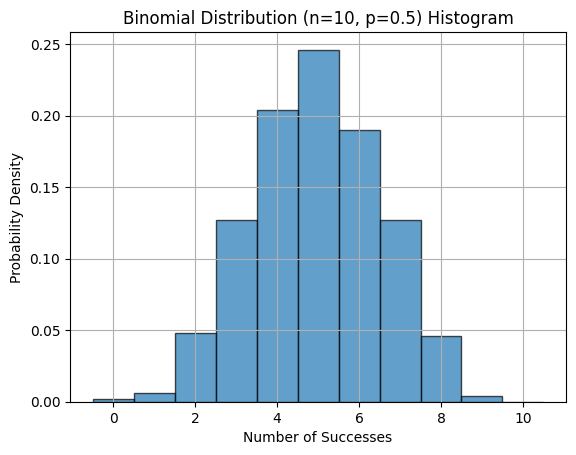

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters for the binomial distribution
n = 10  # Number of trials
p = 0.5 # Probability of success in each trial
size = 1000 # Number of samples to generate

# Generate random samples from a binomial distribution
data = np.random.binomial(n=n, p=p, size=size)

# Create a histogram of the generated data
plt.hist(data, bins=np.arange(-0.5, n + 1.5, 1), density=True, edgecolor='black', alpha=0.7)

# Add title and labels
plt.title(f"Binomial Distribution (n={n}, p={p}) Histogram")
plt.xlabel("Number of Successes")
plt.ylabel("Probability Density")

# Display the plot
plt.grid(True)
plt.show()

7. Implement hypothesis testing using Z-statistics for a sample dataset in Python. Show the Python code and interpret the results.
sample_data = [49.1, 50.2, 51.0, 48.7, 50.5, 49.8, 50.3, 50.7, 50.2, 49.6, 50.1, 49.9, 50.8, 50.4, 48.9, 50.6, 50.0, 49.7, 50.2, 49.5,
50.1, 50.3, 50.4, 50.5, 50.0, 50.7, 49.3, 49.8, 50.2, 50.9,
50.3, 50.4, 50.0, 49.7, 50.5, 49.9]


In [5]:
import numpy as np
from scipy import stats

# 1. Define the sample data
sample_data = [49.1, 50.2, 51.0, 48.7, 50.5, 49.8, 50.3, 50.7, 50.2, 49.6,
               50.1, 49.9, 50.8, 50.4, 48.9, 50.6, 50.0, 49.7, 50.2, 49.5,
               50.1, 50.3, 50.4, 50.5, 50.0, 50.7, 49.3, 49.8, 50.2, 50.9,
               50.3, 50.4, 50.0, 49.7, 50.5, 49.9]

# 2. Define the assumed parameters
mu_0 = 50.0  # Population mean under the null hypothesis
sigma = 1.0  # Assumed population standard deviation
alpha = 0.05  # Significance level

# 3. Calculate sample statistics
sample_mean = np.mean(sample_data)
n = len(sample_data)

# 4. Calculate the Z-statistic
z_statistic = (sample_mean - mu_0) / (sigma / np.sqrt(n))

# 5. Calculate the two-tailed p-value
p_value = 2 * (1 - stats.norm.cdf(np.abs(z_statistic)))

# 6. Print the results
print(f"Sample mean: {sample_mean:.4f}")
print(f"Sample size: {n}")
print(f"Z-statistic: {z_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

# 7. Make a decision
if p_value < alpha:
    print(f"Since the p-value ({p_value:.4f}) is less than alpha ({alpha}), we reject the null hypothesis.")
else:
    print(f"Since the p-value ({p_value:.4f}) is greater than or equal to alpha ({alpha}), we fail to reject the null hypothesis.")

Sample mean: 50.0889
Sample size: 36
Z-statistic: 0.5333
p-value: 0.5938
Since the p-value (0.5938) is greater than or equal to alpha (0.05), we fail to reject the null hypothesis.


8. Write a Python script to simulate data from a normal distribution and calculate the 95% confidence interval for its mean. Plot the data using Matplotlib.

Sample Mean: 49.48
95% Confidence Interval for the Mean: (48.58, 50.38)


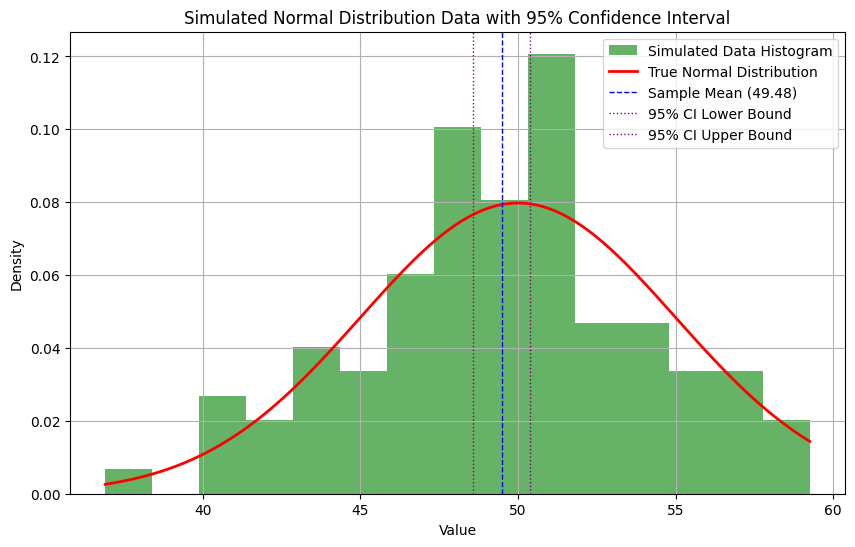

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# 1. Simulate data from a normal distribution
np.random.seed(42)  # for reproducibility
sample_size = 100
mean_true = 50
std_dev_true = 5
data = np.random.normal(loc=mean_true, scale=std_dev_true, size=sample_size)

# 2. Calculate the 95% confidence interval for its mean
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)  # ddof=1 for sample standard deviation
standard_error = sample_std / np.sqrt(sample_size)

# For a 95% confidence interval, alpha = 0.05, so alpha/2 = 0.025
# We use a t-distribution for unknown population standard deviation
degrees_freedom = sample_size - 1
t_critical = stats.t.ppf(0.975, degrees_freedom) # For two-tailed 95% CI

margin_of_error = t_critical * standard_error
confidence_interval_lower = sample_mean - margin_of_error
confidence_interval_upper = sample_mean + margin_of_error

print(f"Sample Mean: {sample_mean:.2f}")
print(f"95% Confidence Interval for the Mean: ({confidence_interval_lower:.2f}, {confidence_interval_upper:.2f})")

# 3. Plot the data using Matplotlib
plt.figure(figsize=(10, 6))
plt.hist(data, bins=15, density=True, alpha=0.6, color='g', label='Simulated Data Histogram')

# Plot the theoretical normal distribution
x = np.linspace(min(data), max(data), 100)
pdf = stats.norm.pdf(x, loc=mean_true, scale=std_dev_true)
plt.plot(x, pdf, 'r-', lw=2, label='True Normal Distribution')

# Plot the sample mean and confidence interval
plt.axvline(sample_mean, color='blue', linestyle='dashed', linewidth=1, label=f'Sample Mean ({sample_mean:.2f})')
plt.axvline(confidence_interval_lower, color='purple', linestyle='dotted', linewidth=1, label='95% CI Lower Bound')
plt.axvline(confidence_interval_upper, color='purple', linestyle='dotted', linewidth=1, label='95% CI Upper Bound')


plt.title('Simulated Normal Distribution Data with 95% Confidence Interval')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

9. Write a Python function to calculate the Z-scores from a dataset and visualize the standardized data using a histogram. Explain what the Z-scores represent in terms of standard deviations from the mean.


Original Data: [ 6  7  7 12 13 13 15 16 19 22]
Mean: 13.00
Standard Deviation: 5.02
Calculated Z-scores: [-1.39443338 -1.19522861 -1.19522861 -0.19920477  0.          0.
  0.39840954  0.5976143   1.19522861  1.79284291]


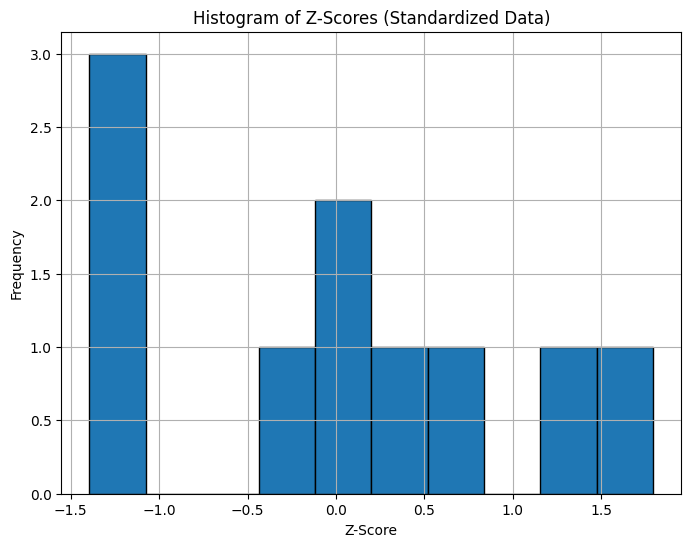

Standard deviation is zero. All data points are identical.
Z-scores cannot be calculated as division by zero would occur.


In [11]:
import numpy as np
import matplotlib.pyplot as plt

def analyze_z_scores(data):
    """
    Calculates Z-scores for a given dataset and visualizes the standardized data
    using a histogram.

    Args:
        data (array-like): The dataset for which to calculate Z-scores.
    """
    if not isinstance(data, (list, np.ndarray)):
        raise TypeError("Input 'data' must be a list or NumPy array.")
    if len(data) == 0:
        print("The dataset is empty. Cannot calculate Z-scores or visualize.")
        return

    # Convert to NumPy array for easier calculations
    data = np.array(data)

    # Calculate mean and standard deviation
    mean = np.mean(data)
    std_dev = np.std(data)

    if std_dev == 0:
        print("Standard deviation is zero. All data points are identical.")
        print("Z-scores cannot be calculated as division by zero would occur.")
        return

    # Calculate Z-scores
    z_scores = (data - mean) / std_dev

    print(f"Original Data: {data}")
    print(f"Mean: {mean:.2f}")
    print(f"Standard Deviation: {std_dev:.2f}")
    print(f"Calculated Z-scores: {z_scores}")

    # Visualize the standardized data using a histogram
    plt.figure(figsize=(8, 6))
    plt.hist(z_scores, bins=10, edgecolor='black')
    plt.title('Histogram of Z-Scores (Standardized Data)')
    plt.xlabel('Z-Score')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Example usage:
dataset = [6, 7, 7, 12, 13, 13, 15, 16, 19, 22]
analyze_z_scores(dataset)

dataset_uniform = [5, 5, 5, 5, 5]
analyze_z_scores(dataset_uniform)